hallway
office
inside
second floor
floors


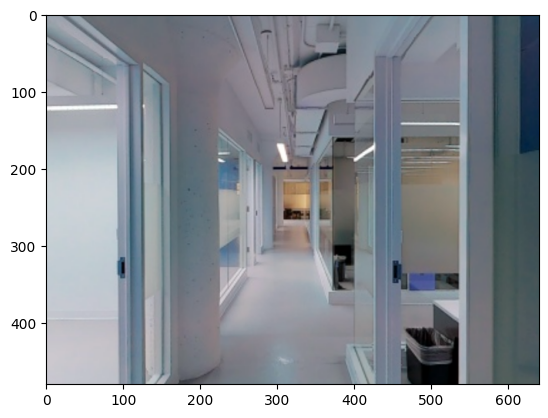

In [4]:
import torch
import clip
from PIL import Image
import numpy as np

images_path = "/egr/research-hlr/joslin/generated_images/B6ByNegPMKs.npy"
#label_path = "/egr/research-hlr/joslin/img_features/objects/object_vocab.txt"
label_path = "faster_obj.txt"
images = np.load(images_path, allow_pickle=True).item()

label_list = []
with open(label_path) as f_read:
    for obj in f_read:
        label_list.append(obj.strip())

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
#image_array = images['17DRP5sb8fy']['5e9f4f8654574e699480e90ecdd150c8'][15]
image_array = images['B6ByNegPMKs']['429c82fd297749ebb8d09f95ef888b3c'][15]
image = preprocess(Image.fromarray(image_array)).unsqueeze(0).to(device)
text = torch.cat([clip.tokenize(f"a photo of a {c}") for c in label_list]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

#print("Label probs:", probs)
from matplotlib import pyplot as plt
plt.imshow(image_array)
# _, indices = torch.sort(probs, descending=True)
# indices = indices.squeeze(0)[:10]
for i in list(indices):
    print(label_list[i])